In [1]:
from konlpy.tag import Okt
import konlpy
import pandas as pd

## 1. 데이터 전처리

### 감성분석을 위한 전문가 총평 태깅 (0 = 부정적, 1 = 긍정적)

In [2]:
df = pd.read_csv('essay_df_2.csv')

df.drop(df.columns[0], inplace=True, axis=1)
df_2 = df[df.feedback.notna()]

In [3]:
df_2[['score', 'feedback']].head()

,score,feedback
0,2.0,전반적으로 호감을 주지 못하는 내용 성실히 쓰려고 노력한 점 질문의 의도에 맞지 ...
1,3.0,"지원회사 및 관련 산업, 직무에 대한 직접적인 준비과정이 없음 질문에 적절한 이..."
2,2.0,회사 및 직무와 관련하여 무엇을 준비하고 노력했는지 알 수 없음 문장이 잘 정리...
3,2.0,지원자가 이 회사에서 무엇을 하고 싶은 지 잘 모르겠음 문장이 잘 정리되어 있음...
4,3.0,실제 업무 경험을 사례로 제시한 점은 좋으나 회사 및 직무와 직접적인 연관이 없고...


In [4]:
# 전문가 총평 데이터 확인

df_2[df_2['score'] == 1].feedback.values[3:7]

array(['전반적으로 아쉬움이 많은 자기소개서입니다. 항목에서 요구하는 사항과 지원자가 작성한 내용이 따로 놀고 있다는 느낌을 주고 있습니다. 자기소개서가 아닌 다른 합격 요인이 있으리라 생각됩니다.장점 : 전반적으로 장점을 찾기 어렵습니다. 단점 : 전체적으로 다시 써야 하는 자기소개서입니다. 자신의 말보다는 항목이 요구하는 사항에 더 집중하여 내용을 구성할 필요가 있습니다.',
       '내용이 많고, 다양한 소재를 활용하여 잘 쓴 것처럼 보이지만 세세하게 읽어보면 문제점이 군데군데 보입니다. 첫 번째 항목에서는 의미파악이 어려운 추상적인 내용이 포함되어 습니다. 두 번째 항목은 직무와 직접적인 연관성이 높은 경험을 제시한 점이 좋지만 절반이상의 분량을 일반적인 포부에 할애하고 있다는 것이 아쉽습니다. 세 번째 항목은 소재는 좋지만 항목에 맞춰 작성했다기 보다는 기존의 자기소개서의 내용을 복사붙여 넣기했다는 의구심이 들게합니다.',
       '자기소개서 분량이 적어서 깊이 있는 분석이 어렵지만 현재 작성된 내용으로 분석하면 전체적으로 다시 작성해야 하는 자기소개서입니다.각각의 항목에서 요구하는 의도를 제대로 파악하지 못하여 요구사항과 다른 내용을 쓴 항목이 있었으며 첫 항목의 경우 성적을 표기한 부분이 헷갈립니다.보완할 부분 및 향상시킬 부분 역시, 특별함이 없거나 의미 전달에 문제가 있었습니다.',
       '본 자기소개서는 기아자동차에 지원한 서류를 그대로 쓴 자기소개서입니다. 평가가 불필요한 자기소개서입니다. 이유불문하고 탈락입니다.'],
      dtype=object)

In [5]:
df_2[df_2['score'] == 5].feedback.values[3:7]

array(['굉장히 상세하고 길게 쓴 자기소개서입니다. 긴 내용임에도 불구하고 지루하지 않았던 이유는 지원자의 글 솜씨 때문입니다. 타 지원자들과 비슷한 소재라도 그 소재가 돋보일 수 있도록 내용에 가치를 부여하는 재주가 있는 지원자 입니다. 또한 직무 관련 직접적인 경험이 있고 그 경험을 사례로 적극적으로 활용하고 있어 지원자의 주장이 전반적으로 논리적으로 납득이 간다는 점이 좋습니다. 또한 표현이 거창하지 않고 쉽고 자연스러워서 진정성이 느껴지고 그로 인해 제시된 내용에 믿음이 생긴다는 점도 큰 장점입니다.',
       '자기소개서 전체적으로 수정이 필요한 부분이 없을 정도로 잘 작성된 자기소개서입니다. 지원자는 글도 잘 쓰고, 커뮤니케이션 능력도 뛰어난 사람이라는 생각이 듭니다. 지원자의 성격적 특징, 제품에 반영된 기술 이해도, 현장 이해도 등 모든 면에서 준비가 잘 된 지원자의 느낌을 주고 있습니다. 무엇보다도 글을 명쾌하게 잘 쓴다는 점이 인상 깊습니다. 지원자는 매 항목마다 결론을 서두에 제시하여 읽는 사람으로 하여금 어떤 내용일지 미리 알게 해주고 있습니다. 그리고 문장도 군더더기 없이 할 말 위주로 깔끔하게 잘 작성되어 있습니다. 특히 산업 및 제품에 대한 분석력이 뛰어난 지원자라는 느낌을 준다는 점이 좋습니다.',
       '제목을 잘 활용하여 아래의 내용을 압축적으로 잘 표현하고 있고, 읽는 이로 하여금 내용을 보다 쉽게 이해할 수 있게 하고 있습니다. 또한 자신의 경험을 아주 상세하게 구체적으로 설명하고 있고, 그것이 직무에 적합한 것 위주로 서술되고 있어 지원자의 업무역량에 대해 긍정적으로 평가할 수 있게 합니다. 지원자가 설명하고 있는 다양한 경험들의 내용 또한 창의적이고 독특한 것들이어서 더 좋은 평가를 받을 수 있습니다. ',
       '항목이 묻고 있는 바에 대해 충실하게 설명하고 있고, 그 내용들이 자신의 구체적인 경험들을 통해 뒷받침되고 있어 설득력이 높습니다. 또한 각각의 내용을 구분하고, 단계별로 구성하는 등의

In [6]:
# 점수별 총평 개수 확인

df_2.groupby('score').size()

score
1.0     61
2.0    549
3.0    288
3.5      1
4.0    163
4.5      4
5.0     50
dtype: int64

4점 이상: 217 개 <br>
1점 : 61개 <br>
<br>


In [7]:
# 1, 2점 합이 총 217개가 되도록 2점 156개를 랜덤으로 추출

temp = df_2[(df_2['score'] == 2)].sample(n = 156, random_state = 0)
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 264 to 1330
Data columns (total 11 columns):
company_id        156 non-null int64
company           156 non-null object
year              156 non-null int64
season            156 non-null object
experience        156 non-null object
position          156 non-null object
score             156 non-null float64
feedback          156 non-null object
content           156 non-null object
views             156 non-null object
position_broad    156 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 14.6+ KB


In [8]:
# 1, 2 점 + 4, 5 점 dataframe 만들기

df_3 = df_2[(df_2['score'] == 1) | (df_2['score'] >= 4)]
df_3 = df_3.append(temp)
df_3.count()

company_id        434
company           434
year              434
season            434
experience        434
position          434
score             434
feedback          434
content           434
views             434
position_broad    434
dtype: int64

In [9]:
df_3.sort_values('score')[['feedback', 'score']].tail()

,feedback,score
1396,가장 좋은 점은 지원자의 글 솜씨 입니다. 흔한 소재 및 경험도 돋보이게 만드는 재...,5.0
1408,자기소개서 전체적으로 수정이 필요한 부분이 없을 정도로 잘 작성된 자기소개서입니다....,5.0
1409,SI업체에서의 해외사업부 전문 인력으로서 필요한 역량들을 골고루 잘 언급해 주었습니...,5.0
1059,전체적으로 본 자기소개서는 나무랄 곳이 없는 잘 쓴 자기소개서의 교과서 적인 자기소...,5.0
1108,전반적으로 잘 작성된 자기소개서입니다. 이 자기소개서는 한국전력기술이 진행하는 PE...,5.0


In [10]:
# 이후 자기소개서 점수평가 함수에 필요하니 df_4도 생성해놓기

df_4 = df_3.copy()

In [11]:
df_3['score'] = df_3.score.apply(lambda x: 0 if x <= 2 else 1)

In [12]:
df_3 = df_3[['feedback', 'score']]

In [13]:
df_3.groupby('score').size()

score
0    217
1    217
dtype: int64

In [14]:
# 모델 적용 이전 총평 불용어처리

stopwords = pd.read_json('stopwords-ko.json')
del_list = ['이다', '하다']
stopwords_list = list(stopwords[0]) + del_list

def del_stopwords(text):

    okt = Okt()
    raw_pos_tagged = okt.pos(text, norm=True, stem=True) 
 
    word_cleaned = []
    
    for word, tag in raw_pos_tagged: 
        if tag not in ["Josa", "Eomi", "Punctuation", "Foreign"]: 
            if (len(word) != 1) & (word not in stopwords_list): 
                word_cleaned.append(word)
    
    new_text = ' '.join(word_cleaned)
    
    return new_text

In [15]:
df_3['feedback'] = df_3.feedback.apply(lambda x: del_stopwords(x))

In [16]:
df_3.feedback[3:10].values

array(['항목 강점 설명 회사 전달 어떻다 기여 쓰다 항목 제외 크게 문제 되다 내용 없다 지원 지원 직무 연관 경험 적극 자다 제시 내용 호감 간다 크다 장점 문장 좋다 내용 군더더기 없다 내용 체계 자다 설명 항목 요구 다양하다 조건 최대한 맞춤 내용 작성 질문 대한 의도 제대로 이해 맞다 자다 써다 느낌 주다',
       '분야 관련 되다 준비 사항 경험 지식 대한 부분 회사 호감 가지다 내용 많다 분명 취업 크다 강점 되다 실제 기업 업무 수행 보다 좋다 고급 자격증 관련 되다 공부 점도 호감 가다 지원 부분 많다 비중 두다 자다 개다 작성 좋다 결과 보완 쓰다 항목 성의 없이 쓸다 느낌 아쉽다',
       '자다 쓰다 지원 감정 최대한 배제 당시 상황 대해 구체 설명 이유 적절하다 제시 요구 명확하다 이해 맞다 군더더기 없이 내용 구성 돋보이다 자다 쓸다 소개 지원 목마 소재 활용 내용 구성 학창시절 적극 생활 통해 많다 경험 느낌 주다 지원 학교 대표 활동 대한 부분 지원 자의 직무 역량 느끼다 호감 주다 면접 한번 보고 싶다 지원 느낌 주다',
       '전반 아쉬움 많다 소개 항목 요구 사항 지원 작성 내용 따로 놀다 느낌 주다 자다 개다 아니다 합격 요인 생각 되다 장점 전반 장점 찾기 어렵다 단점 전체 다시 써다 소개 항목 요구 사항 집중 내용 구성 필요',
       '전체 기다 내용 짜임새 자다 작성 작성 방식 까다롭다 구체 글쓰기 불구 지원 무리 없이 항목 대해 충실하다 내용 제시 일부 항목 일방 내용 포함 되다 충분하다 사전 설명 부족하다 중요하다 요소 아니다 전체 무난 평가 이후 내용 보완 도입 부분 대한 충분하다 설명 조직 사고방식 이르다 입증 사례 제시 추천',
       '제공 되다 글자 제한 매우 적다 편임 싶다 이야기 담다 노력 가장 좋다 서두르다 작성 좋다 질문 물어보다 대해 가장 적합하다 경험 자다 매칭 이렇게 주어지다 문제 경험 자다 매칭 되어다 스스로 어필 면접 이어지다 전형 크다 효과 발휘',
 

## 02. Logistic Regression 을 통한 '전문가 총평' 감성분석

In [17]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score
from sklearn import datasets, model_selection, linear_model
from sklearn.pipeline import Pipeline

In [18]:
# X, Y data 만들기

x_data = df_3.feedback.values
y_data = df_3.score.values

X, y = x_data, y_data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [19]:
print(len(X_train), np.bincount(y_train)) # 트레인 데이터 크기 확인
print(len(X_test), np.bincount(y_test))

303 [147 156]
131 [70 61]


In [57]:
okt = Okt()

tfidf = TfidfVectorizer(lowercase=False, tokenizer = okt.morphs)
model = linear_model.LogisticRegression()
pipe = Pipeline([('vect', tfidf), ('clf', model)])
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [58]:
# Logistic Regression 모델 성능

print('Accuracy: ', accuracy_score(pipe.predict(X_test), y_test))

Accuracy:  0.9007633587786259


In [22]:
from sklearn.metrics import roc_curve, auc


pred_test = pipe.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=pred_test[:,1]) # real y & predicted y (based on "Sepal width")
roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)

roc_auc

0.9611241217798594

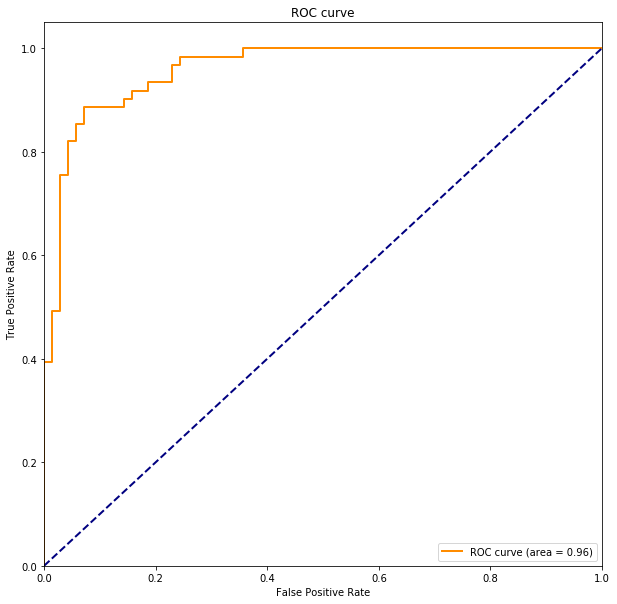

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")

plt.show()

## 02 - 1. Logistic Regression 에 Soynlp 적용해보기 (Twitter/Okt 대신)

In [33]:
pip install soynlp

Note: you may need to restart the kernel to use updated packages.


In [34]:
from soynlp.tokenizer import LTokenizer
from soynlp.word import WordExtractor

In [35]:
lto = LTokenizer()

print(lto.tokenize(X_train[0]))

['전반', '호감', '가다', '내용', '없다', '평범하다', '자다', '개다', '아쉽다', '지원', '직무', '희망', '이유', '특별하다', '없다', '회사', '지원', '동기', '아예', '쓰다', '않다', '개입', '전반', '특별하다', '호감', '가다', '내용', '없다', '지원', '제시', '역량', '그다지', '특별하다', '않다', '많다', '원자', '흔하다', '쓰다', '소재', '내용', '채우다', '지원', '강점', '느껴지다', '않다', '지원', '회사', '특징', '반영', '되다', '않다', '점도', '아쉽다', '회사', '바꾸다', '직무', '경우', '어떻다', '회사', '갖다', '쓸다', '범용', '내용', '아마도', '회사', '지원', '자의', '목표', '회사', '아니다', '오랜', '기간', '회사', '대한', '정보', '찾아보다', '상태', '급하다', '작성', '내다', '자다', '개다', '아니다', '생각', '들다']


In [36]:
word_ext = WordExtractor()
word_ext.train(X_train)
scores = word_ext.word_scores()

training was done. used memory 0.554 Gby 0.550 Gb
all cohesion probabilities was computed. # words = 765
all branching entropies was computed # words = 1421
all accessor variety was computed # words = 1421


In [37]:
import math

score_dict = {key: scores[key].cohesion_forward *
              math.exp(scores[key].right_branching_entropy) 
              for key in scores}

lto = LTokenizer(scores=score_dict)
print(lto.tokenize(X_train[0]))

['전반', '호감', '가다', '내용', '없다', '평범하다', '자다', '개다', '아쉽다', '지원', '직무', '희망', '이유', '특별하다', '없다', '회사', '지원', '동기', '아예', '쓰다', '않다', '개입', '전반', '특별하다', '호감', '가다', '내용', '없다', '지원', '제시', '역량', '그다지', '특별하다', '않다', '많다', '원자', '흔하다', '쓰다', '소재', '내용', '채우다', '지원', '강점', '느껴지다', '않다', '지원', '회사', '특징', '반영', '되다', '않다', '점도', '아쉽다', '회사', '바꾸다', '직무', '경우', '어떻다', '회사', '갖다', '쓸다', '범용', '내용', '아마도', '회사', '지원', '자의', '목표', '회사', '아니다', '오랜', '기간', '회사', '대한', '정보', '찾아보다', '상태', '급하다', '작성', '내다', '자다', '개다', '아니다', '생각', '들다']


In [60]:
tfidf = TfidfVectorizer(lowercase=False, tokenizer = lto.tokenize)
model = linear_model.LogisticRegression()
pipe = Pipeline([('vect', tfidf), ('clf', model)])
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [61]:
print('Accuracy: ', accuracy_score(pipe.predict(X_test), y_test))

Accuracy:  0.9083969465648855


In [40]:
pred_test = pipe.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=pred_test[:,1]) # real y & predicted y (based on "Sepal width")
roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)

roc_auc

0.9587822014051521

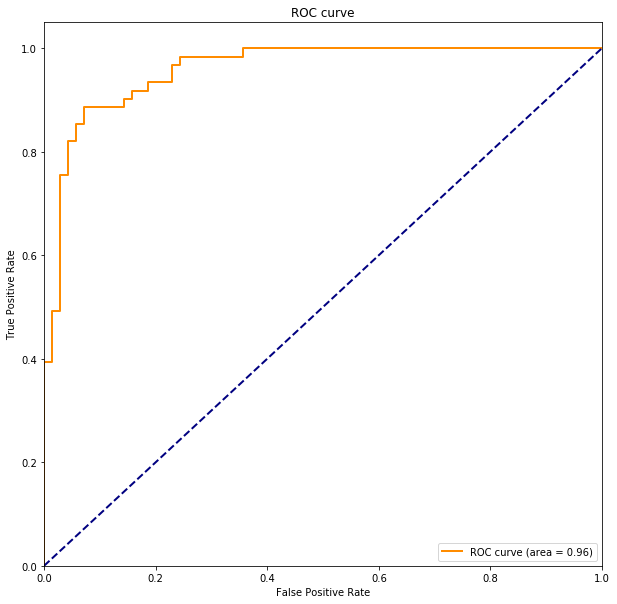

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")

plt.show()

## 모델 테스팅 함수 만들기

In [120]:

def okt_test(model):
    x_data = df_3.feedback.values
    y_data = df_3.score.values
    X, y = x_data, y_data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
    tfidf = TfidfVectorizer(lowercase=False, tokenizer = okt.morphs)
    pipe = Pipeline([('vect', tfidf), ('clf', model)])
    pipe.fit(X_train,y_train)
    
    print('Accuracy: ', accuracy_score(pipe.predict(X_test), y_test))
    return pipe
    
def lto_test(model):
    x_data = df_3.feedback.values
    y_data = df_3.score.values
    X, y = x_data, y_data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    tfidf = TfidfVectorizer(lowercase=False, tokenizer = lto.tokenize)
    pipe = Pipeline([('vect', tfidf), ('clf', model)])
    pipe.fit(X_train,y_train)
    
    print('Accuracy: ', accuracy_score(pipe.predict(X_test), y_test))
    return pipe

## 02 - 2. SGD Classifier

In [116]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier(loss = "hinge", penalty = "l1")

okt_test(model)
lto_test(model)

Accuracy:  0.9310344827586207
Accuracy:  0.9007633587786259


## 02 - 3. SVC

In [117]:
from sklearn.svm import SVC


model = SVC(kernel='rbf', C=10, gamma=0.1)

okt_test(model)
lto_test(model)

Accuracy:  0.9080459770114943
Accuracy:  0.9083969465648855


## 02-4. Gradient Boost Classifier

In [118]:
from sklearn import ensemble

params = {'n_estimators': 1000,
          'max_depth': 5,
          'min_samples_split': 5,
          'learning_rate': 0.01}

model = ensemble.GradientBoostingClassifier(**params)

okt_test(model)
lto_test(model)

Accuracy:  0.8448275862068966
Accuracy:  0.8473282442748091


## 02-4. Logistic Regression

In [119]:
from sklearn import datasets, model_selection, linear_model

model = linear_model.LogisticRegression()

okt_test(model)
lto_test(model)

Accuracy:  0.9022988505747126
Accuracy:  0.9083969465648855


## 03. 총평 감성 예측

In [160]:
x_data = df_3.feedback.values
y_data = df_3.score.values
X, y = x_data, y_data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
tfidf = TfidfVectorizer(lowercase=False, tokenizer = lto.tokenize)
model = linear_model.LogisticRegression()
pipe = Pipeline([('vect', tfidf), ('clf', model)])
pipe.fit(X_train,y_train)


Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [149]:
# 총평 긍/부정 분류기

def feedback_predict():
    
    text = input('총평을 입력해주세요: ')
    
    new_x = del_stopwords(text)
    result = pipe.predict([new_x])

    pipe.predict([new_x])

    if result==0:
        print('\n', np.max(pipe.predict_proba([new_x]))*100, '% 의 확률로 부정적인 총평입니다 :( ')
    else:
        print('\n', np.max(pipe.predict_proba([new_x]))*100, '% 의 확률로 긍정적인 총평입니다! :) ')

In [150]:
# 별점 5점짜리 총평

feedback_predict()

총평을 입력해주세요: 범한 지원동기와 입사 후 포부를 제외하고 나머지 부분은 수정할 필요가 없이 핵심 위주로 잘 쓴 자기소개서 입니다. 전체적으로 읽어보면 지원자는 지원하는 회사에 대해 많은 것을 알고 있다는 것을 알 수 있습니다. 즉, 지원회사에 대한 애정이 있고 시간을 두고 준비를 해 왔다는 느낌을 주고 있습니다.. 지원자의 가장 큰 강점은 글을 잘 쓴다는 것입니다. 한편의 보고서를 보는 것 같이 요구사항에 딱 맞아 떨어지는 소재와 내용으로 군더더기 없이 잘 작성하였고, 지원자가 경험한 사례 역시 신입지원자로서는 수준이 느껴지는 경험이었다는 점이 호감을 주고 있습니다. 면접에서 한 번 보고 싶은 지원자입니다.

 71.47718206902806 % 의 확률로 긍정적인 총평입니다! :) 


In [151]:
# 별점 1점짜리 총평

feedback_predict()

총평을 입력해주세요: 항목의 요구사항에 완벽히 맞도록 작성하지 않은 부분이 대부분이라 아쉽습니다. 지원자의 강점을 직접적으로 묻는 항목에서는 자신의 직무강점이나 역량이 아닌 자신이 중요하게 생각하는 가치에 대해서 작성했고, 단점을 묻는 항목에서는 장단점을 작성하고 장점에 더 많은 분량을 할애하고 있습니다. 또한 회사에 입사하기 위한 노력을 묻는 항목에서는 직무선택동기를 작성하고, ‘차근차근’준비했다고 말하고 있지만 정확히 어떤 것들을 준비해왔다는 것인지 알수가 없습니다. 마지막으로 많지 않은 분량의 글에 매 항목마다 마지막 문장을 기계적인 다짐이나 포부로 작성하였습니다. 하지만 이런 글을 썼다고 해서 지원자에게 특별히 호감을 갖는 인사담당자는 많지 않습니다. 이런 기계적 다짐보다는 항목에서 요구하는 내용에 초점을 맞춰 작성해야 합니다.

 62.940775322801876 % 의 확률로 부정적인 총평입니다 :( 


In [152]:
# 별점 4점짜리 총평

feedback_predict()

총평을 입력해주세요: [별점이유] 지원회사의 특성이 반영된 활동이 없다는 점을 제외하고 특별한 문제없음 [좋은 점] 공적인 조직에서의 활동 강조 [아쉬운 점] 지원자가 왜 근로복지공단을 선택했는지 그 이유를 알 수 없음 [보완요소] 많은 공공기관의 자소서 항목이 경험 위주로 바뀌면서 질문의 주제에 맞는 경험을 제시하는 것이 중요하지만 그렇다고 지원직무지식 및 스킬과 회사 특성에 아무런 연관이 없는 경험 소재를 제시한다면 호감을 끌기 어려울 것입니다. 예를 들어 3번 항목이 정보수집관련 사례를 쓰는 항목인데, 이 부분에서 근로복지와 관련된 자료조사 및 분석 활동을 쓴다면 이 문제가 해결이 될 것입니다. 이 말은 자기소개서를 쓸 때, 전략적인 시각을 가질 필요가 있다는 말입니다. 단순히 질문에 집중하여 그에 맞는 사례만을 생각할 것이 아니라 회사가 관심을 가질 만한 사례를 의도적으로 포함하는 것이 필요하다는 것입니다.

 64.50395509069178 % 의 확률로 부정적인 총평입니다 :( 


In [153]:
# 별점 2점짜리 총평

feedback_predict()

총평을 입력해주세요: 나름대로 공공기관 경험도 제시했고, 사무직에 어울리는 노력도 강조했지만 내용이 특별하지 않고, 지원자가 이 회사의 특성에 잘 맞는지도 확인할 수 없었습니다. 회사에 대한 관심으로 이 회사에 지원한 것 같지는 않습니다. 회사에서 관심을 가질 만한 이야기를 좀 더 직접적으로 준비하는 것이 좋겠습니다. 회사가 수행하는 일에 대해 조사하는 활동, 관련 정책에 대한 학습활동 등 이 회사와 직접적으로 연관 있는 활동을 제시하면 더 호감가는 내용이 

 74.6801395389182 % 의 확률로 부정적인 총평입니다 :( 


In [154]:
# 번외 1) 반어법은 감지 못함 

feedback_predict()

총평을 입력해주세요: 내가 일기를 써도 이것보단 잘 쓰겠다

 57.245365212692356 % 의 확률로 긍정적인 총평입니다! :) 


In [155]:
# 번외 2) 짧은 총평도 잘 감지함

feedback_predict()

총평을 입력해주세요: 작가 등단해도 될 필력임 ㄷㄷ

 71.5829970842781 % 의 확률로 긍정적인 총평입니다! :) 


## 번외) 나의 자기소개서는 몇 %의 확률로 긍정적인 평가를 받을까? 

입력한 자기소개서와 코사인유사도가 가장 높은 자기소개서의 총평을 반환

In [43]:
df_4.head()

,company_id,company,year,season,experience,position,score,feedback,content,views,position_broad
12,1,롯데캐피탈(주),2019,상반기,신입,사무·총무·법무,1.0,"개별 항목, 항목마다 요구하는 내용을 즉흥적으로 작성한 것처럼 보이는 자기소개서입니...",안녕하십니까 저는 응답하라 1986년생 세대 입니다. 롯데과자를 먹고 자라고 생일...,"9,811",경영·사무
22,3,한국서부발전(주),2020,상반기,신입,사무·총무·법무,1.0,4개 항목 중 3개가 질문과 맞지 않는 내용으로 작성했습니다. 이 회사에 지원하기 ...,다양한 경력과 경험사항을 통해 지원한 직무를 위한 다양한 역량들을 키울 수 있었습니...,"5,932",경영·사무
44,3,한국중부발전(주),2017,하반기,신입,사무·총무·법무,1.0,전반적으로 아쉬움이 많은 자기소개서입니다. 가장 큰 문제는 항목에서 요구하는 바를 ...,"""국민들에게 행복함을"" ‘중부발전’이라는 이름으로 국민들에게 행복함을 선물하겠습니다...","7,199",경영·사무
47,3,한국동서발전(주),2017,하반기,신입,사무·총무·법무,4.0,첫 항목인 자신의 강점을 설명하고 지원회사의 비전달성에 어떻게 기여할 수 있는지를 ...,매사에 포기하지 않고 끈기있게 목표를 향해 달려가는 삶을 모토로 인생을 살아왔습니다...,"11,771",경영·사무
48,3,한국전력공사,2017,상반기,신입,사무·총무·법무,4.0,"지원분야와 관련된 준비사항이나 경험, 지식에 대한 부분은 회사에서 호감을 가질 수 ...",지난해 회계감사라는 과목을 들었습니다. 본 과목은 아무래도 그 전에 배우는 재무회계...,"32,026",경영·사무


In [44]:
df_4['content_stop'] = df_4.content.apply(lambda x: del_stopwords(x))

In [161]:
def compare_max():
    
    while True: 
        answer = input("당신의 자기소개서와 유사한 자기소개서가 궁금하신가요?\
                       \n궁금하다면 yes, 궁금하지 않다면 아무 단어나 입력해주세요: \n")

        if answer == 'yes':
            break
        else:
            print("프로그램을 종료합니다.")
            break
          
    essay = input('\n자기소개서를 입력하세요: ')
    
    essay_compare = del_stopwords(essay)
    vectorizer = TfidfVectorizer()
    cosine_dict = {}
    
    for idx, text in enumerate(df_4['content']):
        corpus = [essay_compare, text]
        X = vectorizer.fit_transform(corpus).todense()
        cosine_dict[idx] = cosine_similarity(X[0], X[1])
    
    max_cos = max(cosine_dict, key=cosine_dict.get)
    
    new_x = df_4.iloc[max_cos].feedback
    result = pipe.predict([new_x])
    
    year = df_4.iloc[max_cos].year
    season = df_4.iloc[max_cos].season
    position = df_4.iloc[max_cos].position
    company = df_4.iloc[max_cos].company
    content = df_4.iloc[max_cos].content
    feedback = df_4.iloc[max_cos].feedback
    
    print(f'\n당신의 자기소개서와 가장 유사한 자기소개서는: {year}년 {season}, {company} {position} 직무에 지원했습니다.')
    
    essay_ex = input('\n해당 자기소개서를 열람하시겠습니까? (y/n) : ')
    if essay_ex == 'y':
        print(content)
    else: 
        pass
    
    print('\n해당 자기소개서는:\n')

    if result==0:
        print(np.max(pipe.predict_proba([new_x]))*100, '% 의 확률로 부정적인 평을 받았습니다 :( ')
    else:
        print(np.max(pipe.predict_proba([new_x]))*100, '% 의 확률로 긍정적인 평을 받았습니다! :) ')
        
    feedback_view = input('\n해당 자기소개서의 전문가 총평을 열람하시겠습니까? (y/n) :')
    
    if feedback_view == 'y':
        print(feedback)
    else:
        print('\n감사합니다. 프로그램을 종료합니다.')


In [163]:
# 5점짜리 자소서 입력

compare_max()

당신의 자기소개서와 유사한 자기소개서가 궁금하신가요?                       
궁금하다면 yes, 궁금하지 않다면 아무 단어나 입력해주세요: 
yes

자기소개서를 입력하세요:  "영업의 감동을 이어가고 싶다"  고객에게 최고의 상품을 선택했다는 만족감이라는 감동을 선사하기 위해 캐논코리아 비즈니스솔루션 영업직무에 지원하게 되었으며, 복합기 및 토탈 솔루션 컨설팅 영업 활동을 통해 유무형의 매출을 완성하고 싶습니다.좋은점 1  "좋은 상품 소개해 주셔서 감사합니다." 영업 활동을 하면서 고객에게 감사의 말을 들었을 때 가장 큰 보람을 느꼈습니다. 처음 만나는 고객의 경계심 깊은 시선을 견디며 살얼음판과 같은 긴장감 속에서 고객을 설득하여 저의 파트너로 되어주셨을 때, 그동안의 고생을 모두 보상받는 느낌이 들었기 때문입니다. 그래서 다소 힘이 들더라도 고객의 감동과 만족이라는 보상과 직무에 대한 사명감을 통해 더 열심히 뛰어다닐 수 있었습니다.좋은점 2  캐논코리아 비즈니스솔루션은 제가 경험한 것들을 활용할 수 있는 분야이기에, 저의 능력을 발휘하여 충분히 회사에 이바지할 수 있다고 생각하여 복합기 및 솔루션 기술영업에 지원하게 되었습니다. 좋은점 3학창시절 OOOOOO안과에서 스캔 및 사무보조 아르바이트를 담당하였습니다. 하루 100~200명분의 검사와 수술고객의 차트를 스캔하는 업무로 복합기의 사용빈도가 굉장히 높았고, 캐논의 제품을 비롯하여 다양한 회사의 제품을 사용해 보았기 때문에 우리 제품과 타사제품을 비교하여 고객에게 더 나은 상품 제안이 가능하다고 생각합니다.좋은점 4  또, 대학 시절 IT 관련 수업을 이수하면서 C, Visual Basic, PHP를 통해 프로그래밍 구조에 대해 학습을 했었습니다. 그렇기에 솔루션 판매를 위해 업무 프로세스가 어떻게 연결되는지, 알고리즘이 어떻게 구성되는지 스스로 판독하고 설명할 수 있다고 생각합니다. 실제로 제가 PHP를 통해 만든 솔루션을 통해 강남밝은세상안과의 시스템 절차를 바꾸는 데에 도움을


해당 자기소개서의 전문가 총평을 열람하시겠습니까? (y/n) :y
굉장히 상세하고 길게 쓴 자기소개서입니다. 긴 내용임에도 불구하고 지루하지 않았던 이유는 지원자의 글 솜씨 때문입니다. 타 지원자들과 비슷한 소재라도 그 소재가 돋보일 수 있도록 내용에 가치를 부여하는 재주가 있는 지원자 입니다. 또한 직무 관련 직접적인 경험이 있고 그 경험을 사례로 적극적으로 활용하고 있어 지원자의 주장이 전반적으로 논리적으로 납득이 간다는 점이 좋습니다. 또한 표현이 거창하지 않고 쉽고 자연스러워서 진정성이 느껴지고 그로 인해 제시된 내용에 믿음이 생긴다는 점도 큰 장점입니다.


In [ ]:
캐논코리아비즈니스솔루션(주) 관심기업2017년 하반기 신입 제품·서비스영업합격자소서

"영업의 감동을 이어가고 싶다"

고객에게 최고의 상품을 선택했다는 만족감이라는 감동을 선사하기 위해 캐논코리아 비즈니스솔루션 영업직무에 지원하게 되었으며, 복합기 및 토탈 솔루션 컨설팅 영업 활동을 통해 유무형의 매출을 완성하고 싶습니다.좋은점 1

"좋은 상품 소개해 주셔서 감사합니다." 영업 활동을 하면서 고객에게 감사의 말을 들었을 때 가장 큰 보람을 느꼈습니다. 처음 만나는 고객의 경계심 깊은 시선을 견디며 살얼음판과 같은 긴장감 속에서 고객을 설득하여 저의 파트너로 되어주셨을 때, 그동안의 고생을 모두 보상받는 느낌이 들었기 때문입니다. 그래서 다소 힘이 들더라도 고객의 감동과 만족이라는 보상과 직무에 대한 사명감을 통해 더 열심히 뛰어다닐 수 있었습니다.좋은점 2

캐논코리아 비즈니스솔루션은 제가 경험한 것들을 활용할 수 있는 분야이기에, 저의 능력을 발휘하여 충분히 회사에 이바지할 수 있다고 생각하여 복합기 및 솔루션 기술영업에 지원하게 되었습니다. 좋은점 3학창시절 OOOOOO안과에서 스캔 및 사무보조 아르바이트를 담당하였습니다. 하루 100~200명분의 검사와 수술고객의 차트를 스캔하는 업무로 복합기의 사용빈도가 굉장히 높았고, 캐논의 제품을 비롯하여 다양한 회사의 제품을 사용해 보았기 때문에 우리 제품과 타사제품을 비교하여 고객에게 더 나은 상품 제안이 가능하다고 생각합니다.좋은점 4

또, 대학 시절 IT 관련 수업을 이수하면서 C, Visual Basic, PHP를 통해 프로그래밍 구조에 대해 학습을 했었습니다. 그렇기에 솔루션 판매를 위해 업무 프로세스가 어떻게 연결되는지, 알고리즘이 어떻게 구성되는지 스스로 판독하고 설명할 수 있다고 생각합니다. 실제로 제가 PHP를 통해 만든 솔루션을 통해 강남밝은세상안과의 시스템 절차를 바꾸는 데에 도움을 드리기도 하였습니다.아쉬운점 1

이처럼 제가 걸어온 학습과 경험, 그리고 영업 경력을 바탕으로 캐논코리아 비즈니스솔루션에서 복합기 및 솔루션이라는 유무형의 복합 사업 제안을 잘 수행할 수 있다고 자신합니다. 도전과 혁신이라는 회사의 방침과 공생이라는 캐논의 경영이념처럼 정도 영업을 바탕으로 고객에게 꼭 필요한 상품을 판매하고 고객에게 감동을 드려, 단순히 거래하는 거래처가 아닌 지속해서 믿고 맡기고 싶은 파트너의 모습으로 다가가 회사의 성장에 이바지하는 직원이 되도록 하겠습니다.

"성장 과정을 통한 역량발전 보고서"

어려움을 이겨내고 부족한 부분을 보충하여 영업이라는 외향적인 직무를 하였던 저의 성장 과정을 통해, 노력과 도전정신이라는 저의 역량에 대해 말씀드리겠습니다.아쉬운점 1

어렸을 때 장기자랑 시간의 실수가 트라우마로 남아 사람들 앞에 서면 긴장을 하는 무대 공포증이 생겼습니다. 그러면서 낯선 자리나 많은 사람이 몰리는 장소를 피하게 되었고, 나서기보다는 조용히 지내는 성격으로 자랐습니다. 그러다 대학에 진학하며 멋지게 무대 앞에서 발표하는 선배의 모습에 반하여 무대 공포증을 이겨내려는 목표를 갖게 되었습니다.

1) 다양한 사람을 사귀어 보다 : 자신감과 협동심
이전과는 다르게 많은 사람과 사귀어 보는 시도를 하였습니다. 그러기 위해 학과 학생회를 시작으로 동아리, 학교 모임에 가입하여 다양한 사람들을 만나보았습니다. 그런 열정을 학우들에게 인정받아 2학년 때는 동기 대표, 3학년 때는 축구 동아리 회장이 되어 보면서 `이전의 나`와는 다른 경험을 할 수 있었습니다. 이를 통해 많은 사람 속에서도 중요한 역할을 수행 수 있다는 자신감과 사람들과의 협동심을 얻을 수 있었습니다.

2) 실패를 두려워하지 말자 : 도전정신
무대 공포 트라우마를 없애려고 일부러 이곳저곳 부딪혀 보았습니다. 가장 먼저 여러 수업을 수강하며 발표하는 연습을 했습니다. 대본을 달달 외우거나, 셀프영상을 찍어 문제점을 분석해 보았으며, 결국 많은 사람 앞에 나서는 경험이 중요하다고 느껴 발표 수업을 자원하거나, 노래자랑이나 토론대회를 참여하며 시선에 대한 두려움을 이겨내려 했습니다. 처음에는 사시나무 떨듯 불안한 모습을 보였지만, 실패를 거듭하며 점점 무대를 즐기게 되었고, 연말에는 학과행사의 사회자가 되는 경험도 할 수 있었습니다. 이런 자신감을 통해 금융영업에 대한 목표를 갖게 되었고, OOOO 보험영업 인턴십을 통해 보험설계사로 근무하게 되었습니다.좋은점 1

낯을 가리고, 나서는 것을 꺼렸던 제가 영업이라는 외향적인 직무를 수행하기까지 많은 변화가 있었다고 생각합니다. 그 과정에서 저의 부족한 부분을 파악하고 실패를 두려워 않고 부딪혀보며 발전했으며, 이런 성장 과정이 바탕이 되어 어떤 일을 하더라도 최선을 다하면 벽을 넘을 수 있다는 자신감을 느끼게 되었습니다. 캐논코리아 비즈니스솔루션에서도 저의 도전과 열정이라는 역량을 바탕으로 영업 직무를 수행하면서 지속적으로 발전하는 모습으로 회사의 성장에 이바지하겠습니다.